In [12]:
import math
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
%matplotlib inline

random_seed = 42

In [13]:
data = pd.read_csv("../data/featured/data.csv", sep=';')

Xdata = data.drop('teamA_win', axis=1)
ydata = data.teamA_win

Xdata.columns

Index(['teamA', 'teamB', 'tournament', 'year', 'month', 'day', 'diff_GP',
       'ratio_GP', 'diff_AGT', 'ratio_AGT', 'diff_KD', 'ratio_KD', 'diff_CKPM',
       'ratio_CKPM', 'diff_GPR', 'ratio_GPR', 'diff_GSPD', 'ratio_GSPD',
       'diff_EGR', 'ratio_EGR', 'diff_MLR', 'ratio_MLR', 'diff_GD15',
       'ratio_GD15', 'diff_FB%', 'ratio_FB%', 'diff_FT%', 'ratio_FT%',
       'diff_F3T%', 'ratio_F3T%', 'diff_PPG', 'ratio_PPG', 'diff_HLD%',
       'ratio_HLD%', 'diff_GRB%', 'ratio_GRB%', 'diff_FD%', 'ratio_FD%',
       'diff_DRG%', 'ratio_DRG%', 'diff_ELD%', 'ratio_ELD%', 'diff_FBN%',
       'ratio_FBN%', 'diff_BN%', 'ratio_BN%', 'diff_LNE%', 'ratio_LNE%',
       'diff_JNG%', 'ratio_JNG%', 'diff_WPM', 'ratio_WPM', 'diff_CWPM',
       'ratio_CWPM', 'diff_WCPM', 'ratio_WCPM', 'diff_winrate%',
       'ratio_winrate%'],
      dtype='object')

In [14]:
Xtrain, Xval, ytrain, yval = train_test_split(Xdata, ydata, test_size=0.4, random_state=random_seed)

In [15]:
clf = DecisionTreeClassifier(max_depth=15, random_state=random_seed)
clf.fit(Xtrain, ytrain)

,criterion,'gini'
,splitter,'best'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [16]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, clf.predict(Xtrain))))
print('accuracy score (val): {0:.6f}'.format(metrics.accuracy_score(yval, clf.predict(Xval))))

accuracy score (train): 0.998918
accuracy score (val): 0.579545


In [17]:
val_acc = []
train_acc = []
depths = range(1,101)
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state = random_seed)
    clf.fit(Xtrain, ytrain)
    train_acc.append(metrics.accuracy_score(ytrain, clf.predict(Xtrain)))
    val_acc.append(metrics.accuracy_score(yval, clf.predict(Xval)))

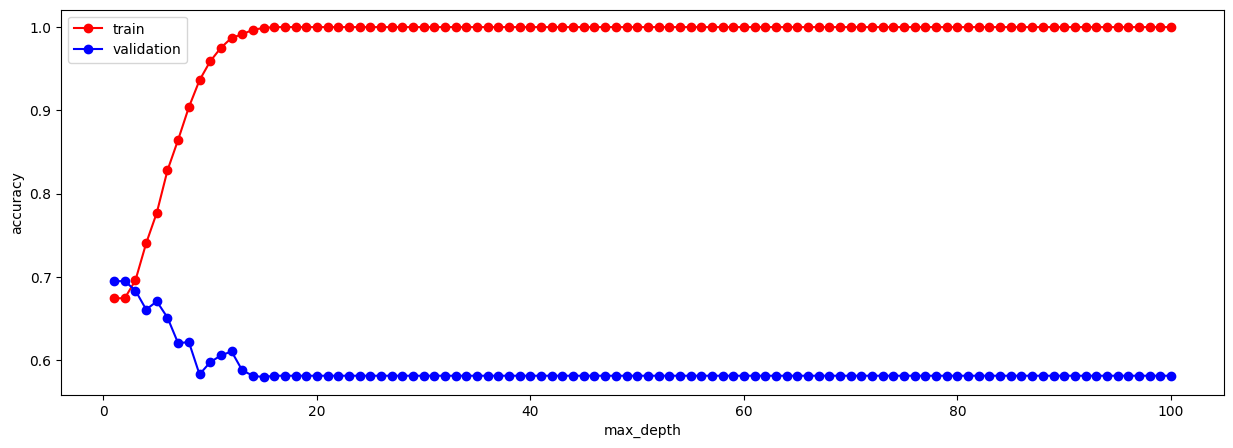

In [18]:
plt.figure(figsize=(15,5))
plt.plot(depths, train_acc,'or-') #o: body, r: barva, -: spojení bodů linkou
plt.plot(depths, val_acc,'ob-')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

In [21]:
optimal_depth = np.argmax(val_acc) + 1
print(f"optimal depth: {optimal_depth}")
clf = DecisionTreeClassifier(max_depth=optimal_depth, random_state = random_seed)
clf.fit(Xtrain, ytrain)

print('accuracy score (val): {0:.6f}'.format(metrics.accuracy_score(yval, clf.predict(Xval))))

optimal depth: 1
accuracy score (val): 0.694805


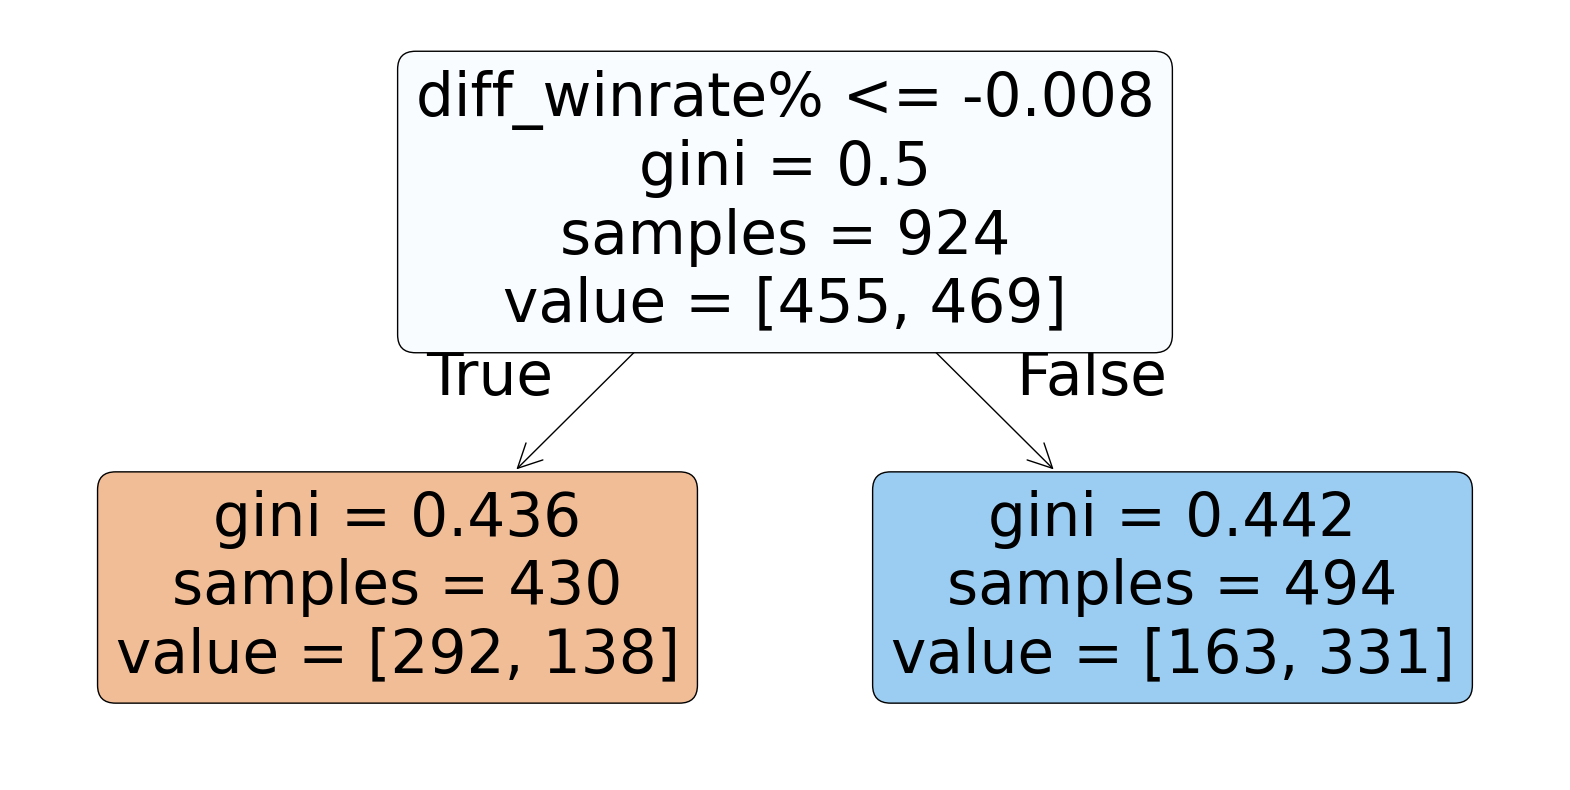

In [22]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
tree.plot_tree(
    clf,
    feature_names=list(Xdata.columns),
    filled=True,
    rounded=True
)
plt.show()

In [45]:
matches = pd.read_csv("../data/cleaned/matches_summer.csv",sep=';')
teams = pd.read_csv("../data/cleaned/teams_summer.csv",sep=';')

In [46]:
matches.columns

matches = set(matches['teamA']).union(set(matches['teamB']))



In [47]:
teams.columns

teams = set(teams['Team'])

In [48]:
print(matches)
print(teams)

{'Nongshim RedForce', 'Fluxo W7M', 'DN Freecs', 'LOUD', 'Team WE', 'GAM Esports', 'KT Rolster', 'Ultra Prime', 'Isurus', 'Disguised', 'Team Heretics', 'ThunderTalk Gaming', 'Leviatan', 'Movistar KOI', 'GiantX', 'Team BDS', 'Cloud9', 'Fnatic', "Anyone's Legend", 'T1', 'FunPlus Phoenix', 'Team Vitality', 'Weibo Gaming', 'Shopify Rebellion', 'SK Gaming', 'DetonatioN FocusMe', 'LNG Esports', 'Top Esports', 'paiN Gaming', 'MGN Vikings Esports', 'Hanwha Life Esports', 'LYON', 'Dplus KIA', 'DRX', 'Team Liquid', 'G2 Esports', 'FlyQuest', 'Gen.G', 'Vivo Keyd Stars', 'Team Secret Whales', 'Chiefs Esports Club', 'Dignitas', 'RED Canids', 'OKSavingsBank BRION', 'Natus Vincere', 'BNK FEARX', 'JD Gaming', 'Bilibili Gaming', 'EDward Gaming', 'Invictus Gaming', 'LGD Gaming', 'CTBC Flying Oyster', 'FURIA', '100 Thieves', 'Ninjas in Pyjamas', 'Fukuoka SoftBank HAWKS gaming', 'PSG Talon', 'Karmine Corp'}
{'paiN Gaming', 'MGN Vikings Esports', 'Nongshim RedForce', 'Hanwha Life Esports', 'Chiefs Esports Cl

In [49]:
diff_A_B = matches - teams  

# rozdíl: co je v B, ale není v A
diff_B_A = teams - matches

In [50]:
print(diff_A_B)

set()


In [51]:
print(diff_B_A)

{'unknown team'}
